In [161]:
#This project is done for the COVID-19 data acquired from the website: https://covidtracking.com/data/download
#This dataset is taken for each state everyday which helps analyze the data state-wise and understand the spread and impact of the disease
import pandas as pd                 #Import required libraries
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv (r'C:\Users\Ananth\Desktop\Syracuse University\652\Homework\COVID_19_dataset.csv')  #Import the data
df.dtypes       #Check the datatypes

date                          int64
state                        object
positive                    float64
negative                    float64
pending                     float64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
inIcuCurrently              float64
inIcuCumulative             float64
onVentilatorCurrently       float64
onVentilatorCumulative      float64
recovered                   float64
dataQualityGrade             object
lastUpdateEt                 object
dateModified                 object
checkTimeEt                  object
death                       float64
hospitalized                float64
dateChecked                  object
totalTestsViral             float64
positiveTestsViral          float64
negativeTestsViral          float64
positiveCasesViral          float64
positiveIncrease              int64
negativeIncrease              int64
totalTestResults              int64
totalTestResultsIncrease      int64
posNeg                      

In [2]:
df.shape 

(6681, 30)

In [162]:
df.describe()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
count,6.681000e+03,6666.000000,6.480000e+03,954.000000,3936.000000,3378.000000,2066.000000,884.000000,1837.000000,310.000000,3698.000000,5983.000000,3378.000000,1.834000e+03,608.000000,6.120000e+02,3558.000000,6681.000000,6681.000000,6.681000e+03,6681.000000,6.681000e+03,6681.000000,6681.000000
mean,2.020047e+07,20467.678518,1.741037e+05,1176.314465,985.196138,4471.505329,412.837851,648.795249,209.614045,164.187097,7975.826122,1172.735417,4471.505329,3.311305e+05,27145.207237,2.978434e+05,30930.143620,408.249065,4600.138901,1.892875e+05,5008.387966,1.892875e+05,18.183954,36.778626
std,1.138377e+02,46484.105235,3.646082e+05,6229.882583,1884.671845,13043.877900,672.504640,564.657176,318.806369,106.176460,14056.683389,3013.108651,13043.877900,5.467515e+05,35252.443853,4.083410e+05,56181.350772,906.424658,9527.386552,3.984181e+05,10029.158133,3.984181e+05,57.810385,292.630160
min,2.020012e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000e+00,6.000000,1.700000e+01,0.000000,-455.000000,-74880.000000,0.000000e+00,-74189.000000,0.000000e+00,-213.000000,-4124.000000
25%,2.020040e+07,414.250000,7.757500e+03,13.000000,104.000000,234.250000,72.250000,177.000000,27.000000,99.000000,519.000000,18.000000,234.250000,3.239475e+04,1229.000000,4.326875e+04,3364.500000,13.000000,118.000000,6.493000e+03,190.000000,6.493000e+03,0.000000,0.000000
50%,2.020050e+07,4204.500000,5.122800e+04,94.000000,381.000000,1018.000000,161.000000,477.500000,86.000000,132.000000,2171.000000,173.000000,1018.000000,1.148535e+05,11177.500000,1.322145e+05,12487.000000,121.000000,1470.000000,5.300900e+04,1626.000000,5.300900e+04,3.000000,0.000000
75%,2.020060e+07,19625.500000,1.867000e+05,477.000000,959.000000,3411.500000,430.500000,990.000000,231.000000,186.750000,7611.000000,871.000000,3411.500000,3.778192e+05,46189.500000,3.611142e+05,34324.250000,424.000000,5085.000000,2.031800e+05,5703.000000,2.031800e+05,14.000000,16.000000
max,2.020070e+07,394954.000000,4.098523e+06,64400.000000,18825.000000,89995.000000,5225.000000,2389.000000,2425.000000,468.000000,90720.000000,24877.000000,89995.000000,4.338718e+06,216375.000000,2.228207e+06,394954.000000,11571.000000,163092.000000,4.338718e+06,165227.000000,4.338718e+06,1877.000000,16373.000000


In [3]:
df.describe()   #Print the statistical attributes of the data

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
count,6.681000e+03,6666.000000,6.480000e+03,954.000000,3936.000000,3378.000000,2066.000000,884.000000,1837.000000,310.000000,...,608.000000,6.120000e+02,3558.000000,6681.000000,6681.000000,6.681000e+03,6681.000000,6.681000e+03,6681.000000,6681.000000
mean,2.020047e+07,20467.678518,1.741037e+05,1176.314465,985.196138,4471.505329,412.837851,648.795249,209.614045,164.187097,...,27145.207237,2.978434e+05,30930.143620,408.249065,4600.138901,1.892875e+05,5008.387966,1.892875e+05,18.183954,36.778626
std,1.138377e+02,46484.105235,3.646082e+05,6229.882583,1884.671845,13043.877900,672.504640,564.657176,318.806369,106.176460,...,35252.443853,4.083410e+05,56181.350772,906.424658,9527.386552,3.984181e+05,10029.158133,3.984181e+05,57.810385,292.630160
min,2.020012e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,...,6.000000,1.700000e+01,0.000000,-455.000000,-74880.000000,0.000000e+00,-74189.000000,0.000000e+00,-213.000000,-4124.000000
25%,2.020040e+07,414.250000,7.757500e+03,13.000000,104.000000,234.250000,72.250000,177.000000,27.000000,99.000000,...,1229.000000,4.326875e+04,3364.500000,13.000000,118.000000,6.493000e+03,190.000000,6.493000e+03,0.000000,0.000000
50%,2.020050e+07,4204.500000,5.122800e+04,94.000000,381.000000,1018.000000,161.000000,477.500000,86.000000,132.000000,...,11177.500000,1.322145e+05,12487.000000,121.000000,1470.000000,5.300900e+04,1626.000000,5.300900e+04,3.000000,0.000000
75%,2.020060e+07,19625.500000,1.867000e+05,477.000000,959.000000,3411.500000,430.500000,990.000000,231.000000,186.750000,...,46189.500000,3.611142e+05,34324.250000,424.000000,5085.000000,2.031800e+05,5703.000000,2.031800e+05,14.000000,16.000000
max,2.020070e+07,394954.000000,4.098523e+06,64400.000000,18825.000000,89995.000000,5225.000000,2389.000000,2425.000000,468.000000,...,216375.000000,2.228207e+06,394954.000000,11571.000000,163092.000000,4.338718e+06,165227.000000,4.338718e+06,1877.000000,16373.000000


In [4]:
pd.set_option('display.max_columns', None)        #Set to display all the columns for the rows required
df.head(5)                                        #Display first five rows of data with all columns

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
0,20200702,AK,1017.0,114892.0,NaN,18.0,NaN,NaN,NaN,1.0,NaN,535.0,A,07-02-20 0:00,2020-07-02T00:00:00Z,07-01-20 20:00,14.0,NaN,2020-07-02T00:00:00Z,115909.0,NaN,NaN,NaN,39,1470,115909,1509,115909,0,0
1,20200702,AL,40111.0,379617.0,NaN,843.0,2835.0,NaN,826.0,NaN,468.0,22082.0,B,07-02-20 11:00,2020-07-02T11:00:00Z,07-02-20 7:00,985.0,2835.0,2020-07-02T11:00:00Z,NaN,NaN,NaN,39604.0,1149,4626,419728,5775,419728,13,32
2,20200702,AR,22075.0,301912.0,NaN,272.0,1477.0,NaN,NaN,72.0,231.0,15698.0,A,07-02-20 14:46,2020-07-02T14:46:00Z,07-02-20 10:46,279.0,1477.0,2020-07-02T14:46:00Z,NaN,NaN,NaN,22075.0,878,8251,323987,9129,323987,2,29
3,20200702,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,6/27/2020 00:00,2020-06-27T00:00:00Z,01-06-26 20:00,0.0,NaN,2020-06-27T00:00:00Z,NaN,NaN,NaN,NaN,0,0,696,0,696,0,0
4,20200702,AZ,87425.0,473414.0,NaN,2938.0,4916.0,723.0,NaN,488.0,NaN,10137.0,A+,07-02-20 0:00,2020-07-02T00:00:00Z,07-01-20 20:00,1757.0,4916.0,2020-07-02T00:00:00Z,560384.0,NaN,NaN,86970.0,3333,7910,560839,11243,560839,37,79


In [5]:
df.head(5)          #Display first five rows of data with all columns

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
0,20200702,AK,1017.0,114892.0,NaN,18.0,NaN,NaN,NaN,1.0,NaN,535.0,A,07-02-20 0:00,2020-07-02T00:00:00Z,07-01-20 20:00,14.0,NaN,2020-07-02T00:00:00Z,115909.0,NaN,NaN,NaN,39,1470,115909,1509,115909,0,0
1,20200702,AL,40111.0,379617.0,NaN,843.0,2835.0,NaN,826.0,NaN,468.0,22082.0,B,07-02-20 11:00,2020-07-02T11:00:00Z,07-02-20 7:00,985.0,2835.0,2020-07-02T11:00:00Z,NaN,NaN,NaN,39604.0,1149,4626,419728,5775,419728,13,32
2,20200702,AR,22075.0,301912.0,NaN,272.0,1477.0,NaN,NaN,72.0,231.0,15698.0,A,07-02-20 14:46,2020-07-02T14:46:00Z,07-02-20 10:46,279.0,1477.0,2020-07-02T14:46:00Z,NaN,NaN,NaN,22075.0,878,8251,323987,9129,323987,2,29
3,20200702,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,6/27/2020 00:00,2020-06-27T00:00:00Z,01-06-26 20:00,0.0,NaN,2020-06-27T00:00:00Z,NaN,NaN,NaN,NaN,0,0,696,0,696,0,0
4,20200702,AZ,87425.0,473414.0,NaN,2938.0,4916.0,723.0,NaN,488.0,NaN,10137.0,A+,07-02-20 0:00,2020-07-02T00:00:00Z,07-01-20 20:00,1757.0,4916.0,2020-07-02T00:00:00Z,560384.0,NaN,NaN,86970.0,3333,7910,560839,11243,560839,37,79


In [6]:
duplicate_rows_df = df[df.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)    #Check and print the number of duplicate rows

number of duplicate rows:  (0, 30)


In [7]:
df.count()

date                        6681
state                       6681
positive                    6666
negative                    6480
pending                      954
hospitalizedCurrently       3936
hospitalizedCumulative      3378
inIcuCurrently              2066
inIcuCumulative              884
onVentilatorCurrently       1837
onVentilatorCumulative       310
recovered                   3698
dataQualityGrade            5580
lastUpdateEt                6326
dateModified                6326
checkTimeEt                 6326
death                       5983
hospitalized                3378
dateChecked                 6326
totalTestsViral             1834
positiveTestsViral           608
negativeTestsViral           612
positiveCasesViral          3558
positiveIncrease            6681
negativeIncrease            6681
totalTestResults            6681
totalTestResultsIncrease    6681
posNeg                      6681
deathIncrease               6681
hospitalizedIncrease        6681
dtype: int

In [8]:
df = df.drop_duplicates()    #Drop the duplicate values

In [9]:
df.count()                 #This shows that there are no duplicate values

date                        6681
state                       6681
positive                    6666
negative                    6480
pending                      954
hospitalizedCurrently       3936
hospitalizedCumulative      3378
inIcuCurrently              2066
inIcuCumulative              884
onVentilatorCurrently       1837
onVentilatorCumulative       310
recovered                   3698
dataQualityGrade            5580
lastUpdateEt                6326
dateModified                6326
checkTimeEt                 6326
death                       5983
hospitalized                3378
dateChecked                 6326
totalTestsViral             1834
positiveTestsViral           608
negativeTestsViral           612
positiveCasesViral          3558
positiveIncrease            6681
negativeIncrease            6681
totalTestResults            6681
totalTestResultsIncrease    6681
posNeg                      6681
deathIncrease               6681
hospitalizedIncrease        6681
dtype: int

In [12]:
df = df.replace(np.nan,0)           #Using NumPy replace all the 'Nan' values with zeroes since those empty spaces means zero data
print(df.head(5))                   #Display first five rows of data with all columns

       date state  positive  negative  pending  hospitalizedCurrently  \
0  20200702    AK    1017.0  114892.0      0.0                   18.0   
1  20200702    AL   40111.0  379617.0      0.0                  843.0   
2  20200702    AR   22075.0  301912.0      0.0                  272.0   
3  20200702    AS       0.0     696.0      0.0                    0.0   
4  20200702    AZ   87425.0  473414.0      0.0                 2938.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                     0.0             0.0              0.0   
1                  2835.0             0.0            826.0   
2                  1477.0             0.0              0.0   
3                     0.0             0.0              0.0   
4                  4916.0           723.0              0.0   

   onVentilatorCurrently  onVentilatorCumulative  recovered dataQualityGrade  \
0                    1.0                     0.0      535.0                A   
1                    0.0    

In [13]:
df.head(5)                  #Display first five rows of data with all columns

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
0,20200702,AK,1017.0,114892.0,0.0,18.0,0.0,0.0,0.0,1.0,0.0,535.0,A,07-02-20 0:00,2020-07-02T00:00:00Z,07-01-20 20:00,14.0,0.0,2020-07-02T00:00:00Z,115909.0,0.0,0.0,0.0,39,1470,115909,1509,115909,0,0
1,20200702,AL,40111.0,379617.0,0.0,843.0,2835.0,0.0,826.0,0.0,468.0,22082.0,B,07-02-20 11:00,2020-07-02T11:00:00Z,07-02-20 7:00,985.0,2835.0,2020-07-02T11:00:00Z,0.0,0.0,0.0,39604.0,1149,4626,419728,5775,419728,13,32
2,20200702,AR,22075.0,301912.0,0.0,272.0,1477.0,0.0,0.0,72.0,231.0,15698.0,A,07-02-20 14:46,2020-07-02T14:46:00Z,07-02-20 10:46,279.0,1477.0,2020-07-02T14:46:00Z,0.0,0.0,0.0,22075.0,878,8251,323987,9129,323987,2,29
3,20200702,AS,0.0,696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,6/27/2020 00:00,2020-06-27T00:00:00Z,01-06-26 20:00,0.0,0.0,2020-06-27T00:00:00Z,0.0,0.0,0.0,0.0,0,0,696,0,696,0,0
4,20200702,AZ,87425.0,473414.0,0.0,2938.0,4916.0,723.0,0.0,488.0,0.0,10137.0,A+,07-02-20 0:00,2020-07-02T00:00:00Z,07-01-20 20:00,1757.0,4916.0,2020-07-02T00:00:00Z,560384.0,0.0,0.0,86970.0,3333,7910,560839,11243,560839,37,79


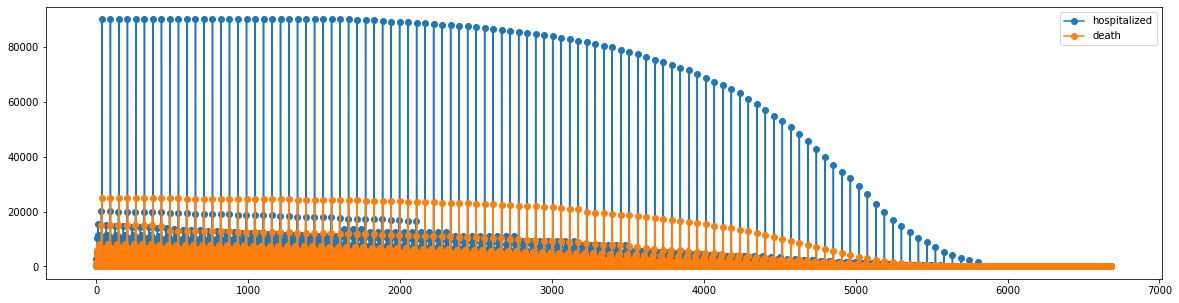

In [14]:
df.plot(y=['hospitalized', 'death',], figsize=(20,5), marker='o');     #Create a plot to visualize deaths vs hospitalized patients

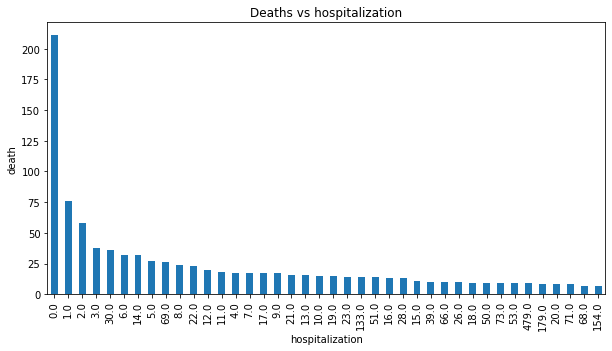

In [163]:
df.positive.value_counts().nlargest(40).plot(kind = 'bar', figsize=(10,5))   #Define the size of the plot
plt.title('Deaths vs hospitalization')   #Define the title for the plot for display
plt.ylabel('death')    #Define the attribute for the x-axis of the plot
plt.xlabel('hospitalization');    #Define the attribute for the y-axis of the plot

                              date  positive  negative   pending  \
date                      1.000000  0.312557  0.428646 -0.038455   
positive                  0.312557  1.000000  0.798348  0.024407   
negative                  0.428646  0.798348  1.000000  0.010115   
pending                  -0.038455  0.024407  0.010115  1.000000   
hospitalizedCurrently    -0.161022  0.585249  0.314634  0.188037   
hospitalizedCumulative    0.144110  0.969500  0.760277  0.524359   
inIcuCurrently           -0.258920  0.522437  0.242425  0.250841   
inIcuCumulative           0.423084  0.926679  0.835784 -0.610577   
onVentilatorCurrently    -0.268121  0.510413  0.181420  0.426987   
onVentilatorCumulative    0.473677  0.842130  0.658542       NaN   
recovered                 0.320790  0.786470  0.839003  0.121117   
death                     0.236654  0.963540  0.680955 -0.021575   
hospitalized              0.144110  0.969500  0.760277  0.524359   
totalTestsViral           0.376691  0.922988  0.

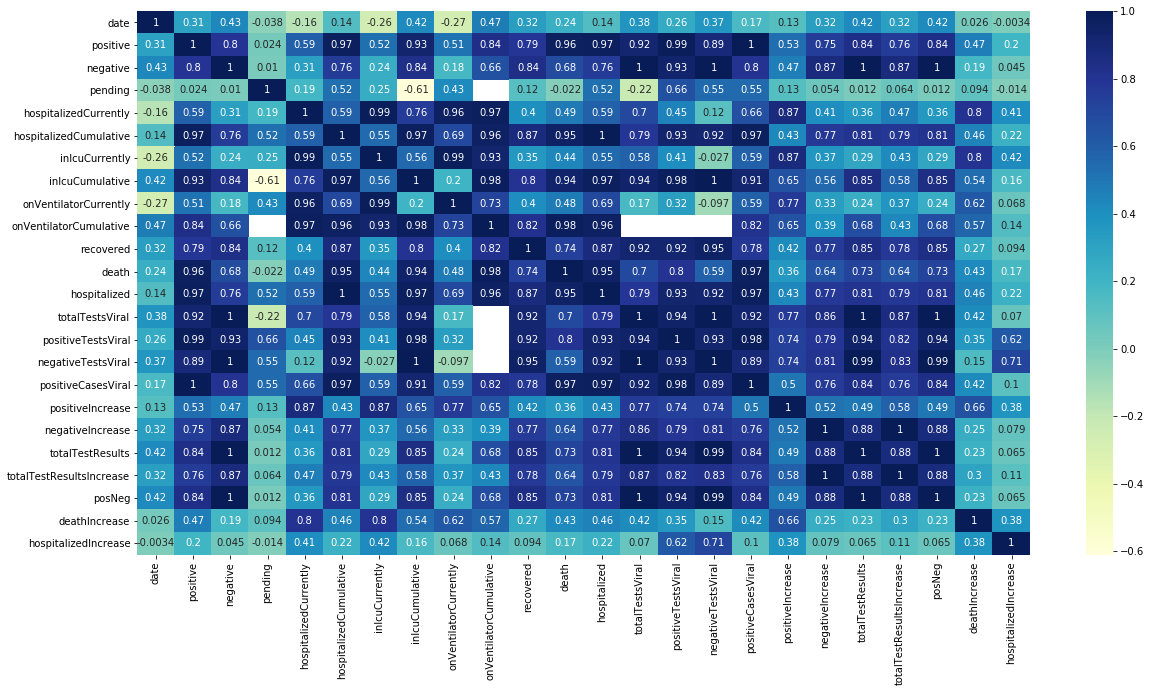

In [165]:
#Plotting a heatmap
plt.figure(figsize=(20,10))  #Define the size of the heat map
heat_map = df.corr()    #Use the correlation function
sns.heatmap(heat_map,cmap = "YlGnBu",annot=True)   #Define the colors of the heatmap
print(heat_map)    #Print the heat map

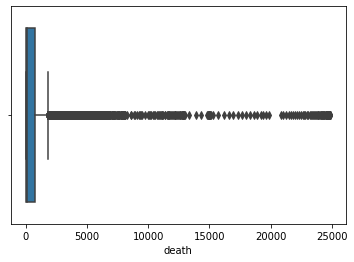

In [21]:
sns.boxplot(x = df['death'])                     #Check for outliers in 'death' column using boxplot

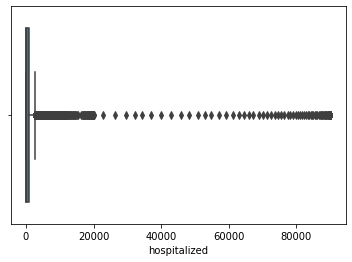

In [22]:
sns.boxplot(x = df['hospitalized'])               #Check for outliers in 'hospitalized' column using boxplot

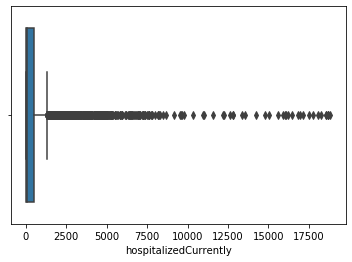

In [23]:
sns.boxplot(x = df['hospitalizedCurrently'])       #Check for outliers in 'hospitalizedCurrently' column using boxplot

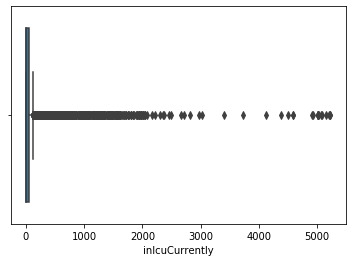

In [24]:
sns.boxplot(x = df['inIcuCurrently'])         #Check for outliers in 'inIcuCurrently' column using boxplot

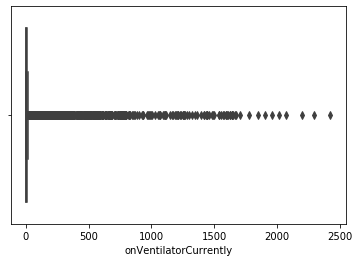

In [25]:
sns.boxplot(x = df['onVentilatorCurrently'])       #Check for outliers in 'onVentilatorCurrently' column using boxplot

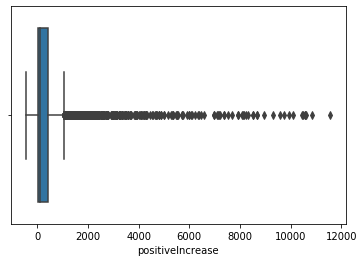

In [26]:
sns.boxplot(x = df['positiveIncrease'])        #Check for outliers in 'positiveIncreased' column using boxplot

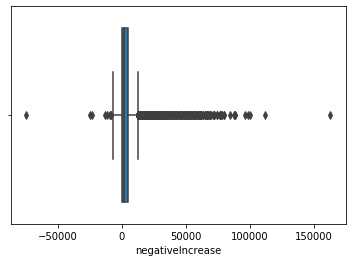

In [27]:
sns.boxplot(x = df['negativeIncrease'])      #Check for outliers in 'negativeIncreased' column using boxplot

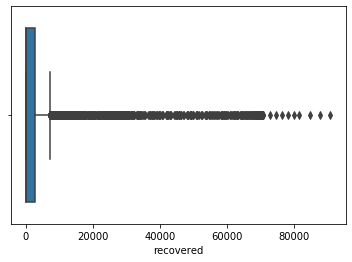

In [28]:
sns.boxplot(x = df['recovered'])   #Check for outliers in 'recovered' column using boxplot

In [29]:
#The following code in this box must be run only once!
import warnings
warnings.filterwarnings("ignore")    #Filter all warning messages

df["state"] = df["state"].map(lambda x: x.lstrip(' '))          #Remove the whitespace in the column 'state'
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')           
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)    #Change the string to datetime
df.set_index("date", inplace = True) 

In [30]:
df.head(5)     #Print the first 5 rows with all the columns of the dataframe

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-02,AK,1017.0,114892.0,0.0,18.0,0.0,0.0,0.0,1.0,0.0,535.0,A,07-02-20 0:00,2020-07-02T00:00:00Z,07-01-20 20:00,14.0,0.0,2020-07-02T00:00:00Z,115909.0,0.0,0.0,0.0,39,1470,115909,1509,115909,0,0
2020-07-02,AL,40111.0,379617.0,0.0,843.0,2835.0,0.0,826.0,0.0,468.0,22082.0,B,07-02-20 11:00,2020-07-02T11:00:00Z,07-02-20 7:00,985.0,2835.0,2020-07-02T11:00:00Z,0.0,0.0,0.0,39604.0,1149,4626,419728,5775,419728,13,32
2020-07-02,AR,22075.0,301912.0,0.0,272.0,1477.0,0.0,0.0,72.0,231.0,15698.0,A,07-02-20 14:46,2020-07-02T14:46:00Z,07-02-20 10:46,279.0,1477.0,2020-07-02T14:46:00Z,0.0,0.0,0.0,22075.0,878,8251,323987,9129,323987,2,29
2020-07-02,AS,0.0,696.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,6/27/2020 00:00,2020-06-27T00:00:00Z,01-06-26 20:00,0.0,0.0,2020-06-27T00:00:00Z,0.0,0.0,0.0,0.0,0,0,696,0,696,0,0
2020-07-02,AZ,87425.0,473414.0,0.0,2938.0,4916.0,723.0,0.0,488.0,0.0,10137.0,A+,07-02-20 0:00,2020-07-02T00:00:00Z,07-01-20 20:00,1757.0,4916.0,2020-07-02T00:00:00Z,560384.0,0.0,0.0,86970.0,3333,7910,560839,11243,560839,37,79


In [35]:
df[df['recovered']==df['recovered'].max()]  #Texas state has the maximum patients who have recovered from COVID-19 on 2nd July, 2020

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-02,TX,175977.0,1799826.0,0.0,7382.0,0.0,0.0,0.0,0.0,0.0,90720.0,B,07-02-20 16:40,2020-07-02T16:40:00Z,07-02-20 12:40,2525.0,0.0,2020-07-02T16:40:00Z,1975803.0,0.0,0.0,0.0,7915,45940,1975803,53855,1975803,44,0


In [36]:
df[df['hospitalized']==df['hospitalized'].max()] #New York state has the maximum hospitalized patients in the entire country

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-02,NY,394954.0,3646639.0,0.0,878.0,89995.0,209.0,0.0,129.0,0.0,70698.0,A,07-01-20 23:59,2020-07-01T23:59:00Z,07-01-20 19:59,24877.0,89995.0,2020-07-01T23:59:00Z,0.0,0.0,0.0,394954.0,875,69070,4041593,69945,4041593,11,0
2020-07-01,NY,394079.0,3577569.0,0.0,879.0,89995.0,226.0,0.0,139.0,0.0,70590.0,A,6/30/2020 23:59,2020-06-30T23:59:00Z,01-06-30 19:59,24866.0,89995.0,2020-06-30T23:59:00Z,0.0,0.0,0.0,394079.0,625,56085,3971648,56710,3971648,11,0
2020-06-30,NY,393454.0,3521484.0,0.0,891.0,89995.0,217.0,0.0,137.0,0.0,70487.0,A,6/29/2020 00:00,2020-06-29T00:00:00Z,01-06-28 20:00,24855.0,89995.0,2020-06-29T00:00:00Z,0.0,0.0,0.0,393454.0,524,51501,3914938,52025,3914938,13,0
2020-06-29,NY,392930.0,3469983.0,0.0,853.0,89995.0,216.0,0.0,136.0,0.0,70435.0,A,6/28/2020 23:59,2020-06-28T23:59:00Z,01-06-28 19:59,24842.0,89995.0,2020-06-28T23:59:00Z,0.0,0.0,0.0,392930.0,391,46037,3862913,46428,3862913,7,0
2020-06-28,NY,392539.0,3423946.0,0.0,869.0,89995.0,229.0,0.0,167.0,0.0,70010.0,A,6/27/2020 23:59,2020-06-27T23:59:00Z,01-06-27 19:59,24835.0,89995.0,2020-06-27T23:59:00Z,0.0,0.0,0.0,392539.0,616,61290,3816485,61906,3816485,5,0
2020-06-27,NY,391923.0,3362656.0,0.0,908.0,89995.0,230.0,0.0,167.0,0.0,70010.0,A,6/26/2020 23:59,2020-06-26T23:59:00Z,01-06-26 19:59,24830.0,89995.0,2020-06-26T23:59:00Z,0.0,0.0,0.0,391923.0,703,72559,3754579,73262,3754579,16,0
2020-06-26,NY,391220.0,3290097.0,0.0,951.0,89995.0,244.0,0.0,167.0,0.0,70010.0,A,6/25/2020 23:59,2020-06-25T23:59:00Z,01-06-25 19:59,24814.0,89995.0,2020-06-25T23:59:00Z,0.0,0.0,0.0,391220.0,805,60918,3681317,61723,3681317,14,0
2020-06-25,NY,390415.0,3229179.0,0.0,996.0,89995.0,270.0,0.0,167.0,0.0,70010.0,A,6/24/2020 23:59,2020-06-24T23:59:00Z,01-06-24 19:59,24800.0,89995.0,2020-06-24T23:59:00Z,0.0,0.0,0.0,390415.0,749,66893,3619594,67642,3619594,18,0
2020-06-24,NY,389666.0,3162286.0,0.0,1071.0,89995.0,290.0,0.0,228.0,0.0,69710.0,A,6/23/2020 23:59,2020-06-23T23:59:00Z,01-06-23 19:59,24782.0,89995.0,2020-06-23T23:59:00Z,0.0,0.0,0.0,389666.0,581,50563,3551952,51144,3551952,16,0


In [77]:
df[df['death']==df['death'].max()] #New York state has the maximum deaths due to COVID-19 on 2nd July, 2020

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-02,NY,394954.0,3646639.0,0.0,878.0,89995.0,209.0,0.0,129.0,0.0,70698.0,A,07-01-20 23:59,2020-07-01T23:59:00Z,07-01-20 19:59,24877.0,89995.0,2020-07-01T23:59:00Z,0.0,0.0,0.0,394954.0,875,69070,4041593,69945,4041593,11,0


In [78]:
df[df['inIcuCurrently']==df['inIcuCurrently'].max()]   #New York state has the maximum patients in ICU on 14th and 15th April, 2020

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-15,NY,213779.0,312233.0,0.0,18535.0,56968.0,5225.0,0.0,0.0,0.0,28004.0,A,4/15/2020 00:00,2020-04-15T00:00:00Z,01-04-14 20:00,11586.0,56968.0,2020-04-15T00:00:00Z,0.0,0.0,0.0,0.0,11571,15298,526012,26869,526012,752,2315
2020-04-14,NY,202208.0,296935.0,0.0,18697.0,54653.0,5225.0,0.0,0.0,0.0,25589.0,A,4/14/2020 00:00,2020-04-14T00:00:00Z,01-04-13 20:00,10834.0,54653.0,2020-04-14T00:00:00Z,0.0,0.0,0.0,0.0,7177,13609,499143,20786,499143,778,1717


In [79]:
df[df['onVentilatorCurrently']==df['onVentilatorCurrently'].max()] #New York state has the maximum patients on ventilator on 7th May, 2020

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-07,NY,327649.0,762267.0,0.0,8665.0,82197.0,2976.0,0.0,2425.0,0.0,55547.0,B,05-07-20 0:00,2020-05-07T00:00:00Z,05-06-20 20:00,20828.0,82197.0,2020-05-07T00:00:00Z,0.0,0.0,0.0,327649.0,3671,30324,1089916,33995,1089916,951,627


In [80]:
df[df['positive']==df['positive'].max()]        #New York state has the maximum positive test results on 2nd July, 2020

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-02,NY,394954.0,3646639.0,0.0,878.0,89995.0,209.0,0.0,129.0,0.0,70698.0,A,07-01-20 23:59,2020-07-01T23:59:00Z,07-01-20 19:59,24877.0,89995.0,2020-07-01T23:59:00Z,0.0,0.0,0.0,394954.0,875,69070,4041593,69945,4041593,11,0


In [81]:
df[df['negative']==df['negative'].max()]        #California state has the maximum negative test results on 2nd July, 2020

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,positiveIncrease,negativeIncrease,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-02,CA,240195.0,4098523.0,0.0,6812.0,0.0,1934.0,0.0,0.0,0.0,0.0,B,07-02-20 0:00,2020-07-02T00:00:00Z,07-01-20 20:00,6163.0,0.0,2020-07-02T00:00:00Z,4338718.0,0.0,0.0,240195.0,7538,77004,4338718,84542,4338718,73,0


In [82]:
Q1 = df.quantile(0.25)         #Impute the outliers using interquartile function after creating the quartiles for the data
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis = 1)]
df.shape    

IQR:  positive                     19083.0
negative                    172273.0
pending                          0.0
hospitalizedCurrently          527.0
hospitalizedCumulative        1044.0
inIcuCurrently                  51.0
inIcuCumulative                  0.0
onVentilatorCurrently            6.0
onVentilatorCumulative           0.0
recovered                     2830.0
death                          704.0
hospitalized                  1044.0
totalTestsViral               4940.0
positiveTestsViral               0.0
negativeTestsViral               0.0
positiveCasesViral           14112.0
positiveIncrease               411.0
negativeIncrease              4967.0
totalTestResults            196687.0
totalTestResultsIncrease      5513.0
posNeg                      196687.0
deathIncrease                   14.0
hospitalizedIncrease            16.0
dtype: float64


(2255, 29)

Coeffecients:  [0.00076682]
Variance score : 0.07986524744754564
Mean Absolute Error:  71.81218689830929


Text(0, 0.5, 'Test')

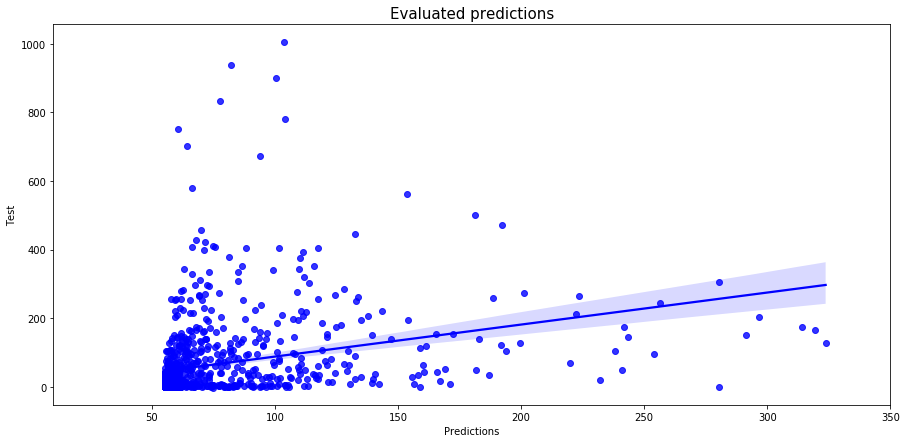

In [115]:
#Create a multiple linear regression model using the below listed attributes to match against the column 'price'
X = df[['totalTestResults']]
Y = df['positiveIncrease']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4)  #Define training and testing sample sizes for testing and training
x_train
reg = LinearRegression()   #Perform linear regression
reg.fit(x_train, y_train)  #Fit the training sets to the model
b = reg.score(x_test, y_test)    #Fit the testing samples and check the score
print('Coeffecients: ', reg.coef_)
print('Variance score :', b)
var1 = reg.predict(x_test)      #Predict the values 
compare1 = mean_absolute_error(y_test, var1)   #Calculate the absolute mean error
print("Mean Absolute Error: ", compare1)
plt.figure(figsize=(15,7))
plt.xlim(10,350)
sns.regplot(y=y_test, x=var1, color='blue')             #Create a plot to show the evaluation of the predictions
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')

Regressor Score:  0.8926884337694599
[ 10060.16610169 114918.          10060.16610169 ...  10060.16610169
  10060.16610169  10060.16610169]


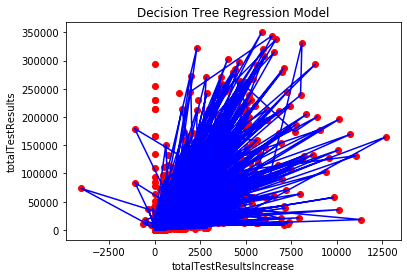

Mean Absolute Error:  5816.026945462722


In [120]:
#Decision Regression Tree Model
X = df.iloc[:, 25:26].values    #Define the columns for Decision Tree Regression model
y = df.iloc[:, 26].values
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)              #Fit the variables for the model
y_pred = regressor.predict(X)        #Predict the output values using inputs
a = regressor.score(X, y)          #Calculate the score from the model
print('Regressor Score: ', a)      
print(y_pred)

#Plot the predicted values
plt.scatter(X, y, color = 'red')        #Define the plot type             
plt.plot(X, regressor.predict(X), color = 'blue')      #Define the color of the line for the regression prediction
plt.title('Decision Tree Regression Model')       #Define the title for the plot
plt.xlabel('totalTestResultsIncrease')                            #Define the x-axis attribute
plt.ylabel('totalTestResults')                               #Define the y-axis attribute
plt.show()                                        #Plot the scatter plot

compare2 = mean_absolute_error(y, y_pred)     #Calculate the absolute mean error by initial values and the predicted values
print("Mean Absolute Error: ", compare2)

In [123]:
df1 = df[['positive', 'negative', 'pending']].copy()              #Copy the columns required for a new dataframe
df1 = df.filter(['positive','negative','pending'], axis=1)        #Create a new dataframe to perform clustering

In [131]:
x = df1.iloc[:, [0,1,2]].values                                   #Perform K-means clustering unsupervised model
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[0 2 0 ... 0 0 0]


In [132]:
kmeans5.cluster_centers_               

array([[   419.89613848,   4062.36684421,      0.        ],
       [  8433.94444444, 155956.6       ,      0.        ],
       [  5459.89029536,  75865.19831224,      0.        ],
       [  2913.21315789,  32295.78947368,      0.        ],
       [ 14149.39130435, 255765.91304348,      0.        ]])

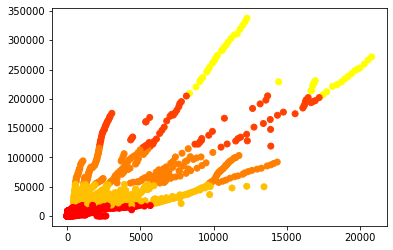

In [146]:
plt.scatter(x[:, 0], x[:, 1],c=y_kmeans5,cmap='autumn')       #Scatter plot of the machine learning model

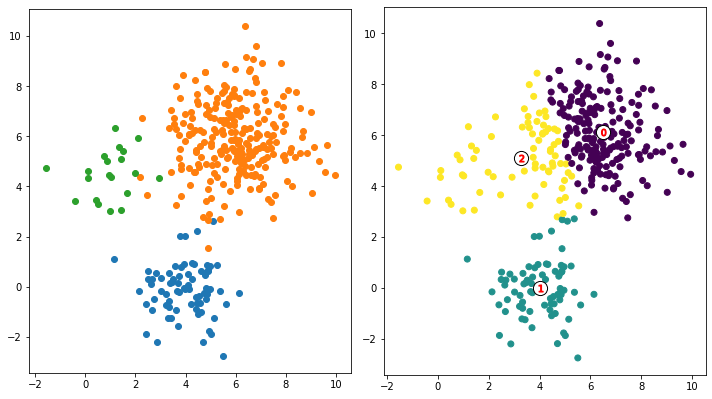

In [154]:
X_1 = np.random.multivariate_normal(mean=[4, 0], cov=[[1, 0], [0, 1]], size=75)     #Create data from three different multivariate distributions
X_2 = np.random.multivariate_normal(mean=[6, 6], cov=[[2, 0], [0, 2]], size=250)
X_3 = np.random.multivariate_normal(mean=[1, 5], cov=[[1, 0], [0, 2]], size=20)
df = np.concatenate([X_1, X_2, X_3])

km = KMeans(n_clusters=3)    #Run kmeans clustering for three clusters
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

fig, ax = plt.subplots(1, 2, figsize=(10, 10))     #Plot the data using scatterplots
ax[0].scatter(X_1[:, 0], X_1[:, 1])
ax[0].scatter(X_2[:, 0], X_2[:, 1])
ax[0].scatter(X_3[:, 0], X_3[:, 1])
ax[0].set_aspect('equal')
ax[1].scatter(df[:, 0], df[:, 1], c=labels)
ax[1].scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centroids):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')
ax[1].set_aspect('equal')
plt.tight_layout()

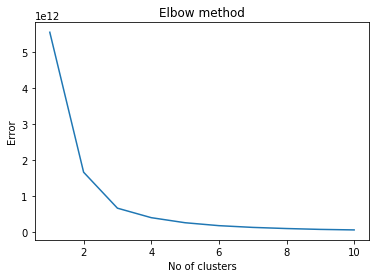

In [155]:
Error =[]                                         #Perform elbow method of clustering evaluation
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()